In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from decimal import Decimal

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

In [2]:
#Messwerte aus Tabelle 1: h_3 über h_1
h_1 = np.array([102,90,122,37,69]) # Starthöhe [mm]
Fehler_h_1 = np.array([2,2,2,2,2])

h_3 = np.array([25,23,27,9,15]) # Endhöhe [mm]
Fehler_h_3 = np.array([2,2,2,2,2])

#Messwerte aus Tabelle 2: Messung für Luft unr Argon
p = 1010.3 *1e2 # Raumdruck [Pa]
Fehler_p = 0.1 *1e2

T_Luft = 47.61 /50 # Periodendauer [s]
Fehler_T_Luft = 0.3 * np.sqrt(2) /50# 2 Messungen mit menschlicher Reaktionszeit von 300 ms
T_Argon = 46.14 /50
Fehler_T_Argon = 0.3 * np.sqrt(2) /50

V_Luft = 5370 *1e-6 # Volumen [m^3]
Fehler_V_Luft = 5 *1e-6
V_Argon = 5460 *1e-6
Fehler_V_Argon = 5 *1e-6

m_Luft = 26.116 *1e-3 # Massed [kg]
Fehler_m_Luft = 0.002 *1e-3
m_Argon = 26.006 *1e-3
Fehler_m_Argon = 0.002 *1e-3

r_Luft = 15.95 /2 *1e-3 # Radius [m]
Fehler_r_Luft = 0.02 /2 *1e-3
r_Argon = 15.97 /2 *1e-3
Fehler_r_Argon = 0.05 /2 *1e-3

1.Messmethode:
kappa_Luft = 1.305326e+00  +-  1.268905e-02
Chi-Quadrat = 2.072020581860139
Freiheitsgrade = 4
Chi-Quadrat reduziert = 0.5180051454650347
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 72.0 %


2.Messmethode:
kappa_Luft = 1.51395e+00  +-  4.057174e-03
kappa_Ar = 1.623906e+00  +-  1.027992e-02


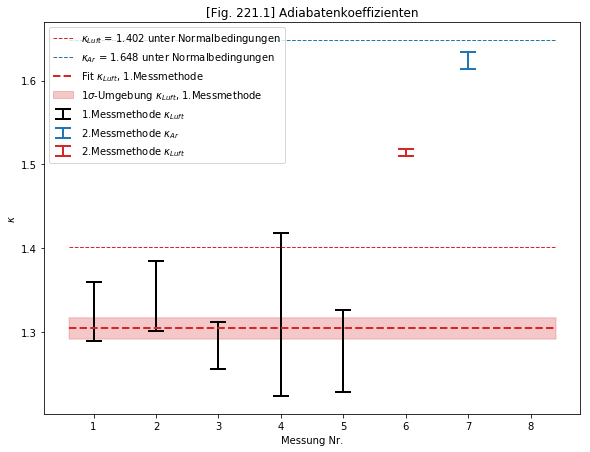

In [6]:
#Messmethode 1
kappa_Luft_1 = h_1/(h_1-h_3)
Fehler_kappa_Luft_1 = (h_1*h_3/(h_1-h_3)**2)*np.sqrt((Fehler_h_1/h_1)**2+(Fehler_h_3/h_3)**2)

#Messmethode 2
kappa_Luft_2 = 4*m_Luft*V_Luft/((r_Luft**4)*(T_Luft**2)*p)
Fehler_kappa_Luft_2 = kappa_Luft_2*np.sqrt((Fehler_m_Luft/m_Luft)**2+(Fehler_V_Luft/V_Luft)**2
                                           +4*(Fehler_r_Luft/r_Luft)**2+2*(Fehler_p/p)**2)

kappa_Ar =  kappa_Ar_2 = 4*m_Argon*V_Argon/((r_Argon**4)*(T_Argon**2)*p)
Fehler_kappa_Ar = kappa_Ar*np.sqrt((Fehler_m_Argon/m_Argon)**2+(Fehler_V_Argon/V_Argon)**2
                                         +4*(Fehler_r_Argon/r_Argon)**2+2*(Fehler_p/p)**2)

#Nummerierung
n = np.linspace(1,kappa_Luft_1.size,kappa_Luft_1.size)
Fehler_n = 1e-12

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (c) = p # c: Konstante
    return x*0+c

model = odr.Model(fit_func)

#darzustellende Daten
x = n
y = kappa_Luft_1
delta_x = Fehler_n
delta_y = Fehler_kappa_Luft_1

#Startparameter
para0 = [0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+3+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 * 1.5, 4.8 * 1.5])
plt.title('[Fig. 221.1] Adiabatenkoeffizienten')
plt.errorbar(x, y, yerr=delta_y, lw=2, ecolor='k', fmt='none', capsize=8, capthick=2, label='1.Messmethode $\kappa_{Luft}$')
plt.errorbar(x.size+2, kappa_Ar, yerr=Fehler_kappa_Ar, lw=2, ecolor='C0', fmt='none', capsize=8, capthick=2, label='2.Messmethode $\kappa_{Ar}$')
plt.errorbar(x.size+1, kappa_Luft_2, yerr=Fehler_kappa_Luft_2, lw=2, ecolor='C3', fmt='none', capsize=8, capthick=2, label='2.Messmethode $\kappa_{Luft}$')
plt.plot(x_fit, x_fit*0+1.402, 'C3--', lw=1, label='$\kappa_{Luft}$ = 1.402 unter Normalbedingungen')
plt.plot(x_fit, x_fit*0+1.648, 'C0--', lw=1, label='$\kappa_{Ar}$ = 1.648 unter Normalbedingungen')
plt.plot(x_fit, fit, 'C3--', lw=2, label='Fit $\kappa_{Luft}$, 1.Messmethode')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+'$\sigma$-Umgebung $\kappa_{Luft}$, 1.Messmethode')
plt.xlabel('Messung Nr.')
plt.ylabel('$\kappa$')
plt.legend(loc='best')

fig.savefig('figures/221_Fig1.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
kappa_Luft_1_mean = popt[0]
Fehler_kappa_Luft_1_mean = perr[0]

#Ausgabe
print('1.Messmethode:')
print('kappa_Luft =', format_e(kappa_Luft_1_mean), ' +- ', format_e(Fehler_kappa_Luft_1_mean))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')
print('\n')
print('2.Messmethode:')
print('kappa_Luft =', format_e(kappa_Luft_2), ' +- ', format_e(Fehler_kappa_Luft_2))
print('kappa_Ar =', format_e(kappa_Ar), ' +- ', format_e(Fehler_kappa_Ar))
